In [1]:
import pandas as pd
import sqlite3
import numpy as np
import datetime as dt

In [2]:
conn = sqlite3.connect('redditPosts_KCL.sqlite')

query = 'SELECT * FROM Posts P JOIN PostBodyAndScore B ON P.id = B.id'
df = pd.read_sql(sql=query, con=conn)
df.head()

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0
2,koch7k,finance,"NYSE to delist three Chinese telecom firms, ci...",QQQult,https://www.reddit.com/r/finance/comments/koch...,1609512819,https://www.theguardian.com/business/2021/jan/...,koch7k,[deleted],1,1.0
3,koe39g,finance,Standard Capital: Partners with SolidBlock Sta...,fintechinshorts,https://www.reddit.com/r/finance/comments/koe3...,1609518689,https://www.fintechinshorts.com/standard-capit...,koe39g,,1,1.0
4,koefpv,finance,5 things every trader needs to know,Aversionsfall,https://www.reddit.com/r/finance/comments/koef...,1609519854,https://yvestalksbitcoin.com/2021/01/01/5-thin...,koefpv,,0,0.4


In [3]:
df.subreddit.unique()

array(['finance', 'options', 'pennystocks', 'Superstonks', 'GME',
       'dogecoin'], dtype=object)

In [4]:
df = df[(df.subreddit == 'Superstonks') |
        (df.subreddit == 'finance') |
        (df.subreddit == 'options') |
        (df.subreddit == 'pennystocks')]

In [5]:
df.head()

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0
2,koch7k,finance,"NYSE to delist three Chinese telecom firms, ci...",QQQult,https://www.reddit.com/r/finance/comments/koch...,1609512819,https://www.theguardian.com/business/2021/jan/...,koch7k,[deleted],1,1.0
3,koe39g,finance,Standard Capital: Partners with SolidBlock Sta...,fintechinshorts,https://www.reddit.com/r/finance/comments/koe3...,1609518689,https://www.fintechinshorts.com/standard-capit...,koe39g,,1,1.0
4,koefpv,finance,5 things every trader needs to know,Aversionsfall,https://www.reddit.com/r/finance/comments/koef...,1609519854,https://yvestalksbitcoin.com/2021/01/01/5-thin...,koefpv,,0,0.4


# Author vs upvote

In [6]:
author_votes = df.groupby('author').upvote_ratio.mean()
author_votes.head()

author
--------sam           1.000000
----The_Truth-----    0.931667
---Tsing__Tao---      1.000000
--Superb              0.765385
--_--_--__--_--_--    0.920000
Name: upvote_ratio, dtype: float64

In [7]:
print(author_votes.values)

[1.         0.93166667 1.         ... 0.75       1.         0.6       ]


In [8]:
authors = author_votes.index.tolist()
upvotes = author_votes.values.tolist()

In [9]:
# Sorting

authors_sorted = [x for _, x in sorted(zip(upvotes, authors))]
upvotes_sorted = [y for y, _ in sorted(zip(upvotes, authors))]

In [10]:
(np.array(upvotes_sorted) < 1).sum()

12371

In [11]:
(np.array(upvotes_sorted) < 1).sum()/len(upvotes_sorted)

0.3466139923229946

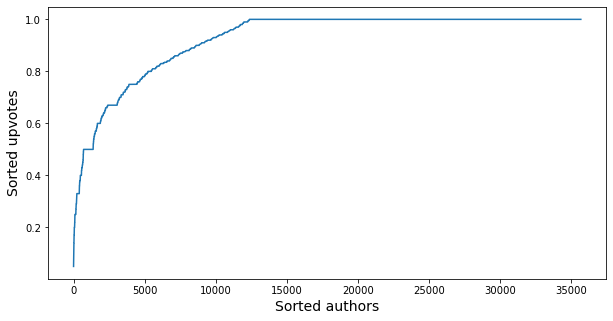

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.plot(range(len(authors_sorted)), upvotes_sorted)

plt.xlabel('Sorted authors', fontsize=14)
plt.ylabel('Sorted upvotes', fontsize=14)

plt.savefig('authors_vs_upvotes.png')
plt.show()

In [13]:
author_scores = df.groupby('author').upvote_ratio.mean()

authors = author_scores.index.tolist()
scores  = author_scores.values.tolist()

authors_sorted = [x for _, x in sorted(zip(upvotes, authors))]
scores_sorted  = [y for y, _ in sorted(zip(scores,  authors))]

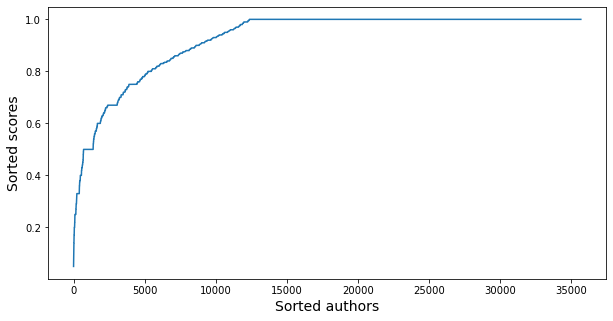

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))

plt.plot(range(len(authors_sorted)), scores_sorted)

plt.xlabel('Sorted authors', fontsize=14)
plt.ylabel('Sorted scores', fontsize=14)

plt.show()

# Timing

In [15]:
dt.datetime(2021,1,1).timestamp()

1609477200.0

In [16]:
dt.datetime.fromtimestamp(1609999000.0).date()

datetime.date(2021, 1, 7)

In [17]:
dt.datetime.fromtimestamp(1609999000.0).minute

56

In [18]:
df['posting_time'] = df['created'].apply(dt.datetime.fromtimestamp)

In [19]:
def to_hour(inp):
    return inp.hour + (inp.minute/60.) + (inp.second/3600.)


df['hour'] = df['posting_time'].apply(to_hour)

In [20]:
df.head()

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio,posting_time,hour
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0,2021-01-01 07:57:48,7.963333
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0,2021-01-01 08:31:53,8.531389
2,koch7k,finance,"NYSE to delist three Chinese telecom firms, ci...",QQQult,https://www.reddit.com/r/finance/comments/koch...,1609512819,https://www.theguardian.com/business/2021/jan/...,koch7k,[deleted],1,1.0,2021-01-01 09:53:39,9.894167
3,koe39g,finance,Standard Capital: Partners with SolidBlock Sta...,fintechinshorts,https://www.reddit.com/r/finance/comments/koe3...,1609518689,https://www.fintechinshorts.com/standard-capit...,koe39g,,1,1.0,2021-01-01 11:31:29,11.524722
4,koefpv,finance,5 things every trader needs to know,Aversionsfall,https://www.reddit.com/r/finance/comments/koef...,1609519854,https://yvestalksbitcoin.com/2021/01/01/5-thin...,koefpv,,0,0.4,2021-01-01 11:50:54,11.848333


In [21]:
from scipy.stats import binned_statistic

bin_mean, bin_edge, _ = binned_statistic(df['hour'], df['upvote_ratio'], statistic='mean', bins=24, range=(0,24))

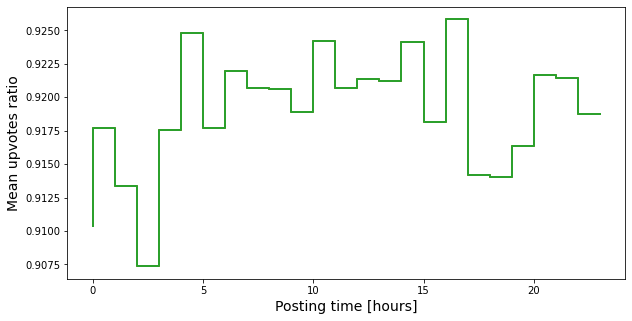

In [22]:
fig = plt.figure(figsize=(10,5))

for subreddit in ['finance','options','pennystocks']:
    plt.step(bin_edge[:-1], bin_mean, lw=2)

plt.xlabel('Posting time [hours]', fontsize=14)
plt.ylabel('Mean upvotes ratio', fontsize=14)
plt.savefig('upvotes_vs_time.png')
plt.show()

# Title length

In [23]:
from nltk.tokenize import TweetTokenizer

tokenizer = TweetTokenizer()
df['tokens'] = df['title'].str.lower().apply(tokenizer.tokenize)

In [24]:
df['title_length'] = df['tokens'].apply(len)
df.head()

,id,subreddit,title,author,url,created,ext_link,id,body,score,upvote_ratio,posting_time,hour,tokens,title_length
0,koaw8g,finance,Tech's top seven companies added $3.4 trillion...,Obrocheetah,https://www.reddit.com/r/finance/comments/koaw...,1609505868,None,koaw8g,[deleted],1,1.0,2021-01-01 07:57:48,7.963333,"[tech's, top, seven, companies, added, $, 3.4,...",12
1,kobbka,finance,Mogo: Establishes ATM Equity Program Mogo a fi...,fintechinshorts,https://www.reddit.com/r/finance/comments/kobb...,1609507913,https://www.fintechinshorts.com/mogo-establish...,kobbka,,1,1.0,2021-01-01 08:31:53,8.531389,"[mogo, :, establishes, atm, equity, program, m...",18
2,koch7k,finance,"NYSE to delist three Chinese telecom firms, ci...",QQQult,https://www.reddit.com/r/finance/comments/koch...,1609512819,https://www.theguardian.com/business/2021/jan/...,koch7k,[deleted],1,1.0,2021-01-01 09:53:39,9.894167,"[nyse, to, delist, three, chinese, telecom, fi...",15
3,koe39g,finance,Standard Capital: Partners with SolidBlock Sta...,fintechinshorts,https://www.reddit.com/r/finance/comments/koe3...,1609518689,https://www.fintechinshorts.com/standard-capit...,koe39g,,1,1.0,2021-01-01 11:31:29,11.524722,"[standard, capital, :, partners, with, solidbl...",18
4,koefpv,finance,5 things every trader needs to know,Aversionsfall,https://www.reddit.com/r/finance/comments/koef...,1609519854,https://yvestalksbitcoin.com/2021/01/01/5-thin...,koefpv,,0,0.4,2021-01-01 11:50:54,11.848333,"[5, things, every, trader, needs, to, know]",7


In [25]:
title_length_votes = df.groupby(['subreddit','title_length']).upvote_ratio.mean()

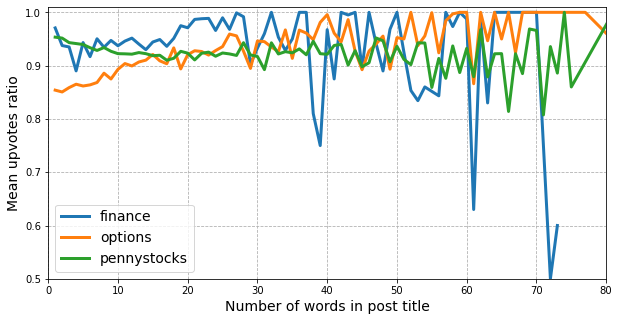

In [26]:
fig = plt.figure(figsize=(10,5))

for subreddit in ['finance','options','pennystocks']:

    plt.plot(title_length_votes[subreddit].index, title_length_votes[subreddit].values, lw=3, label=subreddit)

plt.xlim([0,80])
plt.ylim([0.5,1.01])

plt.xlabel('Number of words in post title', fontsize=14)
plt.ylabel('Mean upvotes ratio', fontsize=14)

plt.legend(loc='lower left', fontsize=14)
plt.grid(ls='--')

plt.savefig('upvotes_vs_length.png')
plt.show()

In [27]:
df.subreddit.unique()

array(['finance', 'options', 'pennystocks', 'Superstonks'], dtype=object)

In [28]:
upvote_no_link   = df[df['ext_link'].isnull()].upvote_ratio
upvote_with_link = df[df['ext_link'].notnull()].upvote_ratio

In [31]:
image_file_formats = ['ai','bmp','gif','ico','jpg','jpeg','png','ps','psd','svg','tif','tiff']
video_file_formats = ['.3g2','3gp','avi','flv','h264','m4v','mkv','mov','mp4','mpg','mpeg','rm','swf','vob','wmv']

In [32]:
def get_ext(inp):
    if inp == None:
        last_term = 'None'
    else:
        last_term = inp.split('.')[-1]
    if (last_term in image_file_formats) or (last_term in video_file_formats):
        out = 1
    else:
        out = 0
    return out

df['image_video'] = df['ext_link'].apply(get_ext)

In [33]:
cnt_no_img, bin_edge = np.histogram(df[df.image_video == 0].upvote_ratio, bins=100, range=(0,1), normed=None, weights=None, density=None)
cnt_with_img, bin_edge = np.histogram(df[df.image_video == 1].upvote_ratio, bins=100, range=(0,1), normed=None, weights=None, density=None)


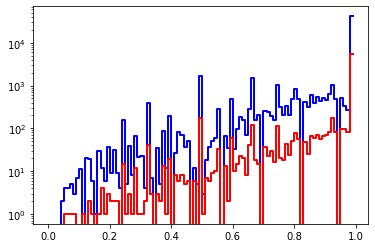

In [34]:
plt.step(bin_edge[:-1], cnt_no_img, 'b-', lw=2)
plt.step(bin_edge[:-1], cnt_with_img, 'r-', lw=2)
plt.yscale('log')
plt.show()

In [35]:
df[df.image_video == 0].upvote_ratio.mean()

0.9185002821202163

In [36]:
df[df.image_video == 1].upvote_ratio.mean()

0.929726424609178

In [37]:
from scipy.stats import ttest_ind

ttest_ind(df[df.image_video == 0].upvote_ratio, df[df.image_video == 1].upvote_ratio, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-6.246131884369276, pvalue=4.3709250581888454e-10)